In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import os
from scipy.stats import zscore
from function import return_yaxis
import baltic as bt
import warnings
warnings.simplefilter('ignore')

In [2]:
os.makedirs('../Figure/Figure4', exist_ok=True)

# Load raw_data

In [3]:
# obtain metadata
Dfam_RM_family = pd.read_csv('../data/TE/provirus_metadata_with_Liftover.csv')
Dfam_RM_family.index = Dfam_RM_family['repeat adjusted subfamily name']
Dfam_RM_family_dict = Dfam_RM_family.to_dict()
Dfam_RM_family.head()

,repeat adjusted subfamily name,repeat subfamily name,repeat family name,repeat class,repeat classification,repeat copy number,repeat average length,branch
repeat adjusted subfamily name,,,,,,,,
LTR10_HERVI_0,LTR10_HERVI_0,LTR10F_HERVIP10FH,LTR10_HERVI,ERV/LTR,ERV1,16,6538,Simiiformes
LTR10_HERVI_1,LTR10_HERVI_1,LTR10D_HERVI,LTR10_HERVI,ERV/LTR,ERV1,9,8018,Simiiformes
LTR18_HERVL18_0,LTR18_HERVL18_0,LTR18C_HERVL18,LTR18_HERVL18,ERV/LTR,ERVL,8,6231,Simiiformes
LTR18_HERVL18_1,LTR18_HERVL18_1,LTR18A_HERVL18,LTR18_HERVL18,ERV/LTR,ERVL,12,6401,Simiiformes
LTR2_HERVE_0,LTR2_HERVE_0,LTR2B_HERVE_a,LTR2_HERVE,ERV/LTR,ERV1,25,8413,Catarrhini


In [4]:
# obtain annotation
Dfam_RM = pd.read_csv('../data/TE/provirus_annotation.csv')
Dfam_RM.index = Dfam_RM['repeat name']
Dfam_RM.head()

,repeat chr,repeat start,repeat end,repeat name,repeat adjusted name,repeat score,repeat strand,repeat family name,repeat subfamily name,repeat adjusted subfamily name,...,5-LTR chr,5-LTR start,5-LTR end,5-LTR name,3-LTR chr,3-LTR start,3-LTR end,3-LTR name,repeat best cluster name,repeat adjusted cluster name
repeat name,,,,,,,,,,,,,,,,,,,,,
LTR2B_Harlequin_chr1_dup1,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,chr1,1418378.0,1418852.0,LTR2B_chr1_dup2,chr1,1412252.0,1412721.0,LTR2B_chr1_dup1,LTR2_Harlequin_0,LTR2_Harlequin_0
THE1C_THE1-int_chr1_dup1,chr1,2954590,2956910,THE1C_THE1-int_chr1_dup1,THE1_THE1-int_1_dup1,2100/8798/2253,-,THE1_THE1-int,THE1C_THE1-int,THE1_THE1-int_1,...,chr1,2956536.0,2956910.0,THE1C_chr1_dup4,chr1,2954590.0,2954963.0,THE1C_chr1_dup3,THE1_THE1-int_1,THE1_THE1-int_1
MSTB_MST-int_chr1_dup1,chr1,3006305,3008814,MSTB_MST-int_chr1_dup1,MST_MST-int_0_dup1,2342/9052/2311,+,MST_MST-int,MSTB_MST-int,MST_MST-int_0,...,chr1,3006305.0,3006735.0,MSTB_chr1_dup8,chr1,3008393.0,3008814.0,MSTB_chr1_dup9,MST_MST-int_1,MST_MST-int_0
LTR66_HERVL66_chr1_dup1,chr1,4587568,4591911,LTR66_HERVL66_chr1_dup1,nan_dup1,4002/973/3928/4575/2847/1557/6552/4132,-,LTR66_HERVL66,LTR66_HERVL66,NaN,...,chr1,4591335.0,4591911.0,LTR66_chr1_dup2,chr1,4587568.0,4588184.0,LTR66_chr1_dup1,NaN,NaN
THE1B_THE1-int_chr1_dup1,chr1,4857446,4859749,THE1B_THE1-int_chr1_dup1,THE1_THE1-int_1_dup2,2707/10328/2309,+,THE1_THE1-int,THE1B_THE1-int,THE1_THE1-int_1,...,chr1,4857446.0,4857808.0,THE1B_chr1_dup15,chr1,4859391.0,4859749.0,THE1B_chr1_dup16,THE1_THE1-int_1,THE1_THE1-int_1


In [5]:
TRIM28_columns = ['TRIM28 summits chr', 'TRIM28 summits start', 'TRIM28 summits end', 'TRIM28 peak name', 'TRIM28 score', 'TRIM28 strand', 'TRIM28 signal value',
                  'TRIM28 p value', 'TRIM28 q value', 'TRIM28 peak chr', 'TRIM28 peak start', 'TRIM28 peak end', 'TRIM28 peak length', 'TRIM28 accession',
                  'TRIM28 experiment', 'TRIM28 assay', 'TRIM28 run type', 'TRIM28 Cell type', 'TRIM28 Cell type class', 'TRIM28 control']

KZFP_columns = ['KZFP summits chr', 'KZFP summits start', 'KZFP summits end', 'KZFP peak name', 'KZFP score', 'KZFP strand', 'KZFP signal value',
                'KZFP p value', 'KZFP q value', 'KZFP peak chr', 'KZFP peak start', 'KZFP peak end', 'KZFP peak length', 'KZFP accession',
                'KZFP gene symbol', 'KZFP experiment', 'KZFP dataset origin', 'KZFP assay', 'KZFP run type', 'KZFP Cell type', 'KZFP Cell type class', 'KZFP control']

TF_columns = ['TF summits chr', 'TF summits start', 'TF summits end', 'TF peak name', 'TF score', 'TF strand', 'TF signal value',
              'TF p value', 'TF q value', 'TF peak chr', 'TF peak start', 'TF peak end', 'TF peak length', 'TF accession',
              'TF gene symbol', 'TF experiment', 'TF assay', 'TF run type', 'TF Cell type', 'TF Cell type class', 'TF control']


In [6]:
# KZFP data
KZFP_metadata = pd.read_csv('../data/ChIP-seq/KZFP_ChIP-seq_metadata.csv')

Dfam_RM_overlap_KZFP = pd.read_table('../data/overlap/provirus_KZFP_overlap.bed', header=None)
Dfam_RM_overlap_KZFP.columns = Dfam_RM.columns.tolist() + KZFP_columns + ['overlap length']
Dfam_RM_overlap_KZFP.head()

,repeat chr,repeat start,repeat end,repeat name,repeat adjusted name,repeat score,repeat strand,repeat family name,repeat subfamily name,repeat adjusted subfamily name,...,KZFP accession,KZFP gene symbol,KZFP experiment,KZFP dataset origin,KZFP assay,KZFP run type,KZFP Cell type,KZFP Cell type class,KZFP control,overlap length
0,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,SRR5197035,PRDM9,GSE78099,Tronolab,ChIP-exo,single-ended,HEK293,Kidney,True,1
1,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,SRR5197035,PRDM9,GSE78099,Tronolab,ChIP-exo,single-ended,HEK293,Kidney,True,1
2,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,SRR5197035,PRDM9,GSE78099,Tronolab,ChIP-exo,single-ended,HEK293,Kidney,True,1
3,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,SRR5197035,PRDM9,GSE78099,Tronolab,ChIP-exo,single-ended,HEK293,Kidney,True,1
4,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,SRR5197089,ZNF257,GSE78099,Tronolab,ChIP-exo,single-ended,HEK293,Kidney,True,1


In [7]:
# load TE targets
KZFP_target = pd.read_csv('../data/targets/provirus_targets_for_analysis.csv')
display(KZFP_target.head())

# load KRAB-ZFP metadata
KZFP_dataset_df = pd.read_csv('../data/ChIP-seq/KZFP_metadata.csv', index_col=0)
KZFP_dataset_df = KZFP_dataset_df[KZFP_dataset_df['classification (Genome research)']=='protein_coding']
KZFP_dataset_dict = KZFP_dataset_df.to_dict()
KZFP_dataset_df.head()

,KZFP gene symbol,repeat adjusted subfamily name,target region,ratio,p value,q value,log10 q value,normalized score,rank,overlap peak count to all copies,...,binding rate,repeat family name,repeat class,repeat classification,emergence era of TE subfamily,evolutionary age of TE subfamily,evolutionary age of KZFP for analysis,emergence era of KZFP for analysis,evolutionary age of KZFP in Imbeault et al.,evolutionary age of KZFP in Tribolet-Hardy et al.
0,ZSCAN29,MER9_HERVK9_1,3-LTR,42.981357,3.614508e-16,5.530197e-14,13.257259,1.000000,Primary,12,...,0.038095,MER9_HERVK9,ERV/LTR,ERVK,Catarrhini,29.4,179.2,NaN,179.2,NaN
1,ZNF90,LTR7_HERVH_0,Int,30.895326,3.275148e-37,3.912930e-35,34.407498,1.000000,Primary,33,...,0.284483,LTR7_HERVH,ERV/LTR,ERV1,Homininae,9.1,9.1,Homininae,15.8,9.1
2,ZNF90,LTR7_HERVH_2,Int,39.283853,5.114941e-37,3.912930e-35,34.407498,1.000000,Primary,30,...,0.352941,LTR7_HERVH,ERV/LTR,ERV1,Hominoidea,20.2,9.1,Homininae,15.8,9.1
3,ZNF90,LTR7_HERVH_1,Int,27.727265,1.034371e-35,5.275295e-34,33.277753,0.967166,Primary,33,...,0.261905,LTR7_HERVH,ERV/LTR,ERV1,Hominoidea,20.2,9.1,Homininae,15.8,9.1
4,ZNF90,LTR7_HERVH_3,Int,52.484490,7.016319e-16,2.683742e-14,13.571259,0.394427,Secondary,11,...,0.500000,LTR7_HERVH,ERV/LTR,ERV1,Hominidae,15.8,9.1,Homininae,15.8,9.1


,gene_name,gene_id,classification (Genome research),Age,Age (Genome research),Age adjusted,Species,KRAB domain,interactK1,interact with,Number of ZNFs,z_C2H2_miss,cluster
PRDM7,NaN,NaN,protein_coding,NaN,352.0,352.0,NaN,NaN,NaN,NaN,NaN,NaN,noCluster
ZNF705A,ZNF705A,ENSG00000196946,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,3.0,-0.910143,noCluster
ZNF705B,ZNF705B,ENSG00000215356,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,3.0,NaN,noCluster
ZNF705G,ZNF705G,ENSG00000215372,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,2.0,6.659968,noCluster
ZNF212,ZNF212,ENSG00000170260,protein_coding,179.2,312.1,312.0,Platypus,NaN,NO,NaN,3.0,-0.910143,chr7.3


# Process raw_data

In [8]:
# filtering
Dfam_RM_fil = Dfam_RM[(Dfam_RM['5-LTR name'].isna()==False) & (Dfam_RM['3-LTR name'].isna()==False) & (Dfam_RM['repeat adjusted subfamily name'].isna()==False)]
print(len(Dfam_RM), len(Dfam_RM_fil))

Dfam_RM_overlap_KZFP_fil = Dfam_RM_overlap_KZFP[Dfam_RM_overlap_KZFP['repeat name'].isin(Dfam_RM_fil['repeat name'])].copy()
print(len(Dfam_RM_overlap_KZFP), len(Dfam_RM_overlap_KZFP_fil))

5518 5294
44720 41762


In [9]:
# add repeat subfamily name
Dfam_RM_fil_dict = Dfam_RM_fil.to_dict()
Dfam_RM_overlap_KZFP_fil['repeat adjusted subfamily name'] = Dfam_RM_overlap_KZFP_fil['repeat name'].apply(lambda x:Dfam_RM_fil_dict['repeat adjusted subfamily name'][x])

In [10]:
# add peak summit position in repeat
def return_position_in_repeat(summit, r_s, r_e, strand):

    if strand == '+':

        return summit - r_s
    
    else:

        return r_e - summit


# KRAB-ZFP
position_in_repeat_list = list()
for summit, r_s, r_e, strand in Dfam_RM_overlap_KZFP_fil[['KZFP summits start', 'repeat start', 'repeat end', 'repeat strand']].values:

    position = return_position_in_repeat(summit, r_s, r_e, strand)
    position_in_repeat_list.append(position)

Dfam_RM_overlap_KZFP_fil['summit start in repeat'] = position_in_repeat_list

In [11]:
def return_region_in_repeat(summit, LTR5_s, LTR5_e, LTR3_s, LTR3_e, strand):
            
    if LTR5_s <= summit and summit <= LTR5_e :
                
        return '5-LTR'
            
    elif LTR3_s <= summit and summit <= LTR3_e:

        return '3-LTR'

    else:

        if (LTR5_e <= summit and summit <= LTR3_s) or (LTR3_e <= summit and summit <= LTR5_s):

            return 'Int'

        else:

            print(summit, LTR5_s, LTR5_e, LTR3_s, LTR3_e, strand)


# KRAB-ZFP
position_in_repeat_list = list()
for summit, LTR5_s, LTR5_e, LTR3_s, LTR3_e, strand in Dfam_RM_overlap_KZFP_fil[['KZFP summits start', '5-LTR start', '5-LTR end', '3-LTR start', '3-LTR end', 'repeat strand']].values:

    position = return_region_in_repeat(summit, LTR5_s, LTR5_e, LTR3_s, LTR3_e, strand)
    position_in_repeat_list.append(position)

Dfam_RM_overlap_KZFP_fil['summit region in repeat'] = position_in_repeat_list 

# Fig.4B

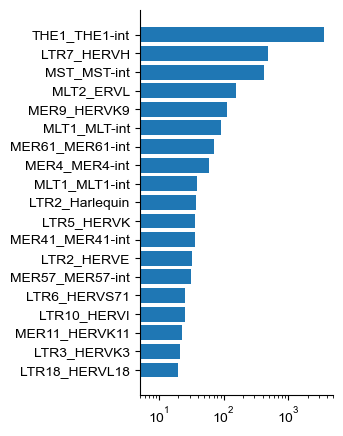

In [12]:
# count provirus copies

fig = plt.figure(figsize=[2.5, 5])
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

data = Dfam_RM_fil['repeat family name'].value_counts().sort_values()

x = data.index
y = data.values

p = plt.barh(y=x, width=y)

plt.xlim(5, 5000)
plt.xscale('log')
#plt.xlabel('copy number')
#plt.ylabel('family')
plt.xlabel('')
plt.ylabel('')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.rcParams["font.family"] = "Arial"
fig.savefig('../Figure/Figure4/Figure4B.png', bbox_inches='tight', dpi=300)
fig.savefig('../Figure/Figure4/Figure4B.pdf', bbox_inches='tight', transparent=True, dpi=300)

# Fig.4C

In [13]:
# calcurate binding rate

binding_rate_dict = dict()
ChIP_count = KZFP_metadata['KZFP gene symbol'].value_counts()
for i, (family, KZFP, region) in enumerate(KZFP_target[['repeat family name', 'KZFP gene symbol', 'target region']].value_counts().index):

    Dfam = Dfam_RM_fil[Dfam_RM_fil['repeat family name']==family]

    # obtain overlap
    KZFP_overlap = Dfam_RM_overlap_KZFP_fil[(Dfam_RM_overlap_KZFP_fil['repeat family name']==family) & (Dfam_RM_overlap_KZFP_fil['KZFP gene symbol']==KZFP) & (Dfam_RM_overlap_KZFP_fil['summit region in repeat']==region)]

    # count
    count = (pd.crosstab(KZFP_overlap['repeat name'], KZFP_overlap['KZFP accession'])>=1).sum(axis=1).rename('KZFP binding') / ChIP_count[KZFP]
    
    data = pd.concat([Dfam, count], axis=1)
    data['KZFP binding'] = data['KZFP binding'].fillna(0)

    # summarize
    groupby = data[['repeat adjusted subfamily name', 'KZFP binding']].groupby(by=['repeat adjusted subfamily name']).mean()

    # record
    binding_rate_dict[(family, KZFP, region)] = data

    print(i, family, KZFP, region, len(Dfam), len(KZFP_overlap), 'done')

0 LTR7_HERVH ZNF534 Int 479 408 done
1 MER9_HERVK9 ZNF816 3-LTR 114 140 done
2 MER9_HERVK9 ZNF761 5-LTR 114 129 done
3 MER9_HERVK9 ZNF761 3-LTR 114 127 done
4 LTR7_HERVH ZNF90 Int 479 123 done
5 THE1_THE1-int ZNF585B Int 3575 2843 done
6 THE1_THE1-int ZNF793 Int 3575 593 done
7 THE1_THE1-int ZNF675 Int 3575 3058 done
8 THE1_THE1-int ZNF586 Int 3575 1437 done
9 MST_MST-int ZNF679 5-LTR 424 116 done
10 MST_MST-int ZNF679 3-LTR 424 106 done
11 MST_MST-int ZNF675 Int 424 290 done
12 MST_MST-int ZNF586 Int 424 132 done
13 MST_MST-int ZNF585B Int 424 264 done
14 MER9_HERVK9 ZNF816 Int 114 86 done
15 MER9_HERVK9 ZNF440 Int 114 65 done
16 LTR7_HERVH ZNF75D Int 479 151 done
17 THE1_THE1-int ZNF707 Int 3575 1456 done
18 LTR2_Harlequin ZNF493 Int 38 26 done
19 THE1_THE1-int PRDM9 3-LTR 3575 378 done
20 MLT2_ERVL ZNF157 Int 154 186 done
21 MER9_HERVK9 ZNF723 Int 114 58 done
22 MER9_HERVK9 ZNF28 Int 114 43 done
23 MER4_MER4-int ZNF724P Int 60 24 done
24 MER4_MER4-int ZNF43 Int 60 34 done
25 MER41_M

In [14]:
# calcurate maximum difference

dataset_list = list()

for i, (family, KZFP, region) in enumerate(KZFP_target[['repeat family name', 'KZFP gene symbol', 'target region']].value_counts().index):

    data = binding_rate_dict[(family, KZFP, region)]

    groupby = data[['repeat adjusted subfamily name', 'KZFP binding']].groupby(by=['repeat adjusted subfamily name']).mean()
    max = groupby['KZFP binding'].max()
    min = groupby['KZFP binding'].min()
    mean = data['KZFP binding'].mean()

    dataset_list.append([family, KZFP, region, mean, max, min, max-min])

dataset_df = pd.DataFrame(dataset_list, columns=['repeat family name', 'KZFP gene symbol', 'region', 'binding_rate mean', 'binding_rate max', 'binding_rate min', 'binding_rate diff'])
dataset_df

,repeat family name,KZFP gene symbol,region,binding_rate mean,binding_rate max,binding_rate min,binding_rate diff
0,LTR7_HERVH,ZNF534,Int,0.803758,1.000000,0.225806,0.774194
1,MER9_HERVK9,ZNF816,3-LTR,0.307018,0.385714,0.152778,0.232937
2,MER9_HERVK9,ZNF761,5-LTR,0.377193,0.495238,0.166667,0.328571
3,MER9_HERVK9,ZNF761,3-LTR,0.371345,0.457143,0.166667,0.290476
4,LTR7_HERVH,ZNF90,Int,0.256785,0.500000,0.050847,0.449153
...,...,...,...,...,...,...,...
89,THE1_THE1-int,ZNF679,5-LTR,0.254545,0.520564,0.010161,0.510403
90,LTR6_HERVS71,ZNF239,3-LTR,0.130000,0.227273,0.035714,0.191558
91,THE1_THE1-int,ZNF766,3-LTR,0.015441,0.043064,0.005053,0.038011
92,THE1_THE1-int,ZNF766,5-LTR,0.013594,0.038728,0.004113,0.034616


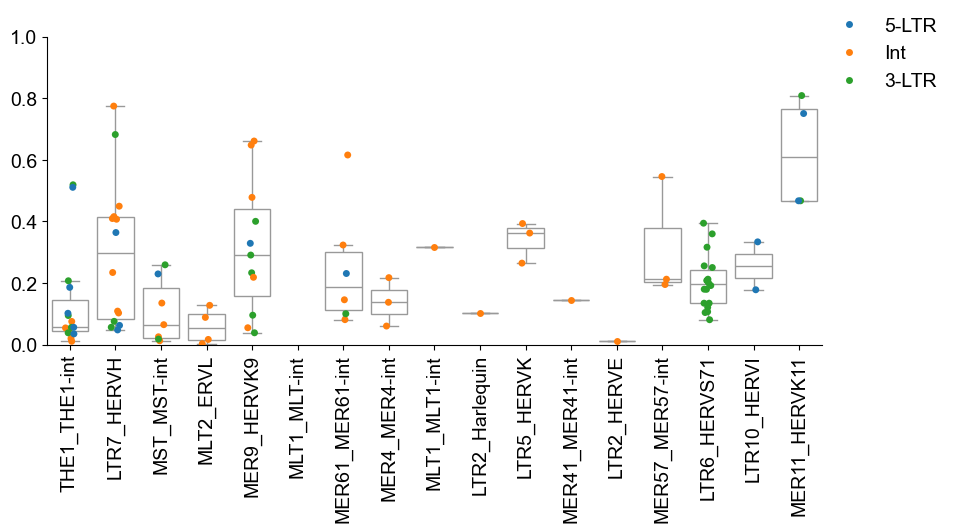

In [15]:
fig = plt.figure(figsize=[10, 4])
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

data = dataset_df
y = data['binding_rate diff']
x = data['repeat family name']
hue = data['region']

order = Dfam_RM_fil['repeat family name'].value_counts().index[:-2]
hue_order = ['5-LTR', 'Int', '3-LTR']


sns.boxplot(x=x, y=y, order=order, color='white', flierprops={"marker": ""})
sns.stripplot(x=x, y=y, hue=hue, order=order, hue_order=hue_order, s=5)

plt.ylim(0, 1)
#plt.ylabel('binding rate (Max-Min)')
#plt.xlabel('family')
plt.ylabel('')
plt.xlabel('')

plt.xticks(rotation=90)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc=[1, 0.8], frameon=False)

fig.savefig('../Figure/Figure4/Figure4C.png', bbox_inches='tight', dpi=300)
fig.savefig('../Figure/Figure4/Figure4C.pdf', bbox_inches='tight', transparent=True, dpi=300)

# Load LTR7_HERVH data

In [18]:
family = 'LTR7_HERVH'

Dfam_RM = pd.read_csv('../data/TE/{}.annotation.csv'.format(family))
KZFP_df = pd.read_csv('../data/overlap/{}_KZFP.csv'.format(family))
TRIM28_df = pd.read_csv('../data/overlap/{}_TRIM28.csv'.format(family))
MSA_df = pd.read_csv('../data/MSA/{}_MSA.csv'.format(family), index_col=0)
MSA_df.columns = list(map(int, MSA_df.columns))
tree = bt.loadNewick('../data/phylogenetic tree/{}_reroot.contree'.format(family))
Dfam_RM_metadata = pd.read_csv('../data/TE/provirus_metadata_with_Liftover.csv')
Dfam_RM_metadata.index = Dfam_RM_metadata['repeat adjusted subfamily name']

In [19]:
# load TE targets
KZFP_target = pd.read_csv('../data/targets/provirus_targets_for_analysis.csv')
KZFP_target = KZFP_target[(KZFP_target['repeat family name']==family)].sort_values(by='q value')
display(pd.unique(KZFP_target['KZFP gene symbol']))

array(['ZNF184', 'ZNF534', 'ZNF75D', 'ZNF600', 'ZNF808', 'ZNF90',
       'ZNF735', 'ZNF700', 'ZNF257', 'ZNF705D', 'ZFP57'], dtype=object)

# Process LTR7_HERVH data

In [20]:
reorder_dict = {'LTR7_HERVH_5': 'LTR7_HERVH_1', 'LTR7_HERVH_4': 'LTR7_HERVH_2', 'LTR7_HERVH_1': 'LTR7_HERVH_3', 'LTR7_HERVH_7': 'LTR7_HERVH_4',
                'LTR7_HERVH_2': 'LTR7_HERVH_5', 'LTR7_HERVH_3': 'LTR7_HERVH_6', 'LTR7_HERVH_6': 'LTR7_HERVH_7', 'LTR7_HERVH_0': 'LTR7_HERVH_8'}

In [21]:
# カラーをつける
color_subfamily_dict = dict()
color_name_dict = dict()

color_list = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'pink', 'black', 'grey', 'black']
branch_list = ['Vertebrata', 'Tetrapoda', 'Amniota', 'Mammalia', 'Theria', 'Eutheria', 'Boreoeutheria', 'Euarchontoglires', 'Primatomorpha', 
               'Primates', 'Haplorrhini', 'Simiiformes', 'Catarrhini', 'Hominoidea', 'Hominidae', 'Homininae', 'Hominini']

subfamily_list = ['LTR7_HERVH_5', 'LTR7_HERVH_4', 'LTR7_HERVH_1', 'LTR7_HERVH_7', 'LTR7_HERVH_2', 'LTR7_HERVH_3', 'LTR7_HERVH_6', 'LTR7_HERVH_0']


for i, (subfamily, color) in enumerate(zip(subfamily_list, color_list)):

    color_subfamily_dict[subfamily] = color

        
for i, (subfamily, name) in enumerate(Dfam_RM[['repeat adjusted subfamily name', 'repeat adjusted name']].values):

    if subfamily not in color_subfamily_dict:

        print(subfamily)
        color_name_dict[name] = 'black'
        color_subfamily_dict[subfamily] = 'black'
        
    else:
        
        color_name_dict[name] = color_subfamily_dict[subfamily]

c_func = lambda x: color_name_dict[x.name] if x.name in color_name_dict.keys() else 'black'

# Fig.4D

In [22]:
### process data for visualization

family = 'LTR7_HERVH'

ax = plt.subplot()
plt.close()
df = return_yaxis(tree, ax=ax, colour=c_func, size=10).sort_values(by='y', ascending=True)
df.index = range(len(df))

# annotation
Dfam_RM_dict = Dfam_RM.copy()
Dfam_RM_dict.index = Dfam_RM_dict['repeat name']
Dfam_RM_dict = Dfam_RM_dict.to_dict()

Dfam = Dfam_RM.copy()
Dfam.index = Dfam['repeat adjusted name']
Dfam = Dfam.loc[list(reversed(df['repeat adjusted name'].values.tolist()))]
Dfam.index = Dfam['repeat name']

# KZFP
KZFP_overlap = KZFP_df[KZFP_df['repeat family name']==family]
KZFP_crosstab = pd.crosstab(KZFP_overlap['repeat name'], KZFP_overlap['KZFP gene symbol'])
KZFP_crosstab = pd.concat([Dfam, KZFP_crosstab>=1], axis=1).fillna(0)

# TRIM28
TRIM28_overlap = TRIM28_df[TRIM28_df['repeat family name']==family]
TRIM28_summit_list = [[50, 150], [795, 895], [1625, 1725], [4670, 4770], [7230, 7330], [9300, 9400]]
TRIM28 = list()
summit_name_list = list()
for start, end in TRIM28_summit_list:

    data = TRIM28_overlap[(TRIM28_overlap['summit position in repeat alignment'].astype('float')>=start) & (TRIM28_overlap['summit position in repeat alignment'].astype('float')<=end)]
    TRIM28.append(data['repeat name'].value_counts().rename('{}-{}'.format(start, end)))
    summit_name_list.append('{}-{}'.format(start, end))

TRIM28 = pd.concat(TRIM28, axis=1)
TRIM28_crosstab = pd.concat([Dfam, TRIM28>=1], axis=1).fillna(0)

LTR7_HERVH {'ZNF184': 'red', 'ZNF534': 'blue', 'ZNF75D': 'green', 'ZNF600': 'purple', 'ZNF808': 'orange', 'ZNF90': 'yellow'}


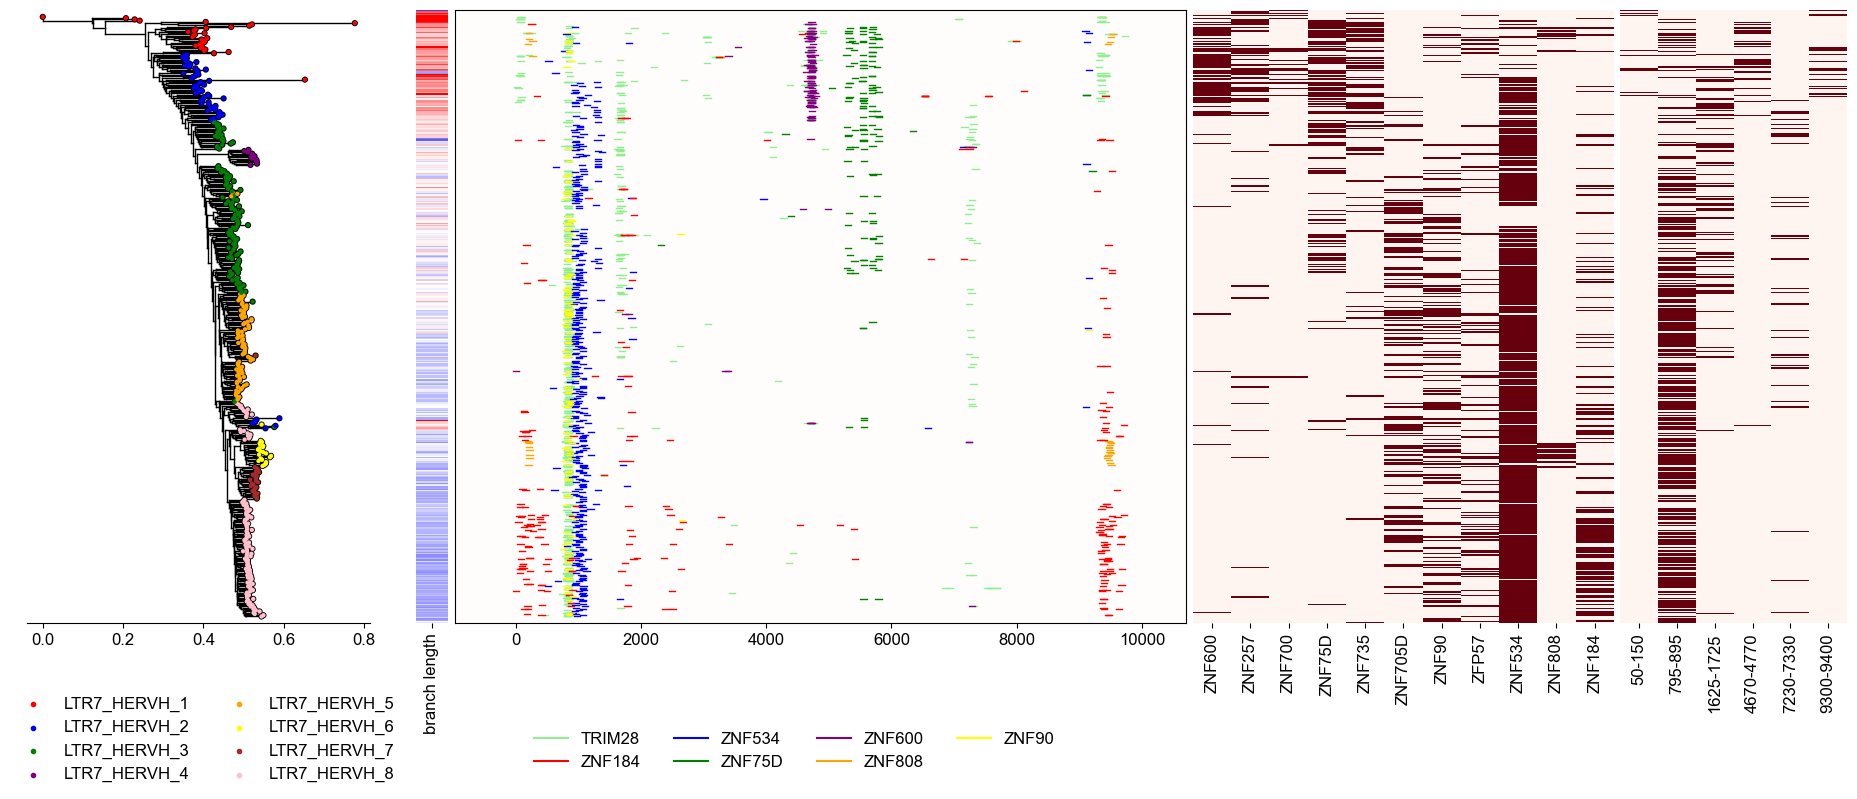

In [24]:
### visualization of phylogenetic tree

fig = plt.figure(figsize=[30, 10])
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12
    
gs = GridSpec(10, 60)
ax = plt.subplot(gs[2:10, :9])

p1 = tree.plotTree(ax=ax, width=1)
p2 = tree.plotPoints(ax=ax, colour=c_func, size=10)

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

[ax.spines[loc].set_visible(False) for loc in ['top','right','left']]

ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])
ax.set_ylim(-5,tree.ySpan+5)
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])

ylim = p1.get_ylim()

# Legend
legend_elements = []
for i, subfamily in enumerate(reorder_dict.keys()):
    color = color_subfamily_dict[subfamily]
    label = 'LTR7_HERVH_{}'.format(i+1)
    p = ax.scatter([-1], [-1], marker='.', label=label, color=color)

ax.legend(loc=[-0.05, -0.27], ncol=2, fontsize=12, frameon=False)


### visualization of TRIM28 and KZFP peaks
df = return_yaxis(tree, ax=ax, colour=c_func, size=10).sort_values(by='y', ascending=True)
df.index = range(len(df))
df

ax = plt.subplot(gs[2:10, 11:30])
ax.set_facecolor('seashell')
ax.patch.set_alpha(0.2)

name_order_dict = dict()
for i, (name, y) in enumerate(df[['repeat adjusted name', 'y']].values):

    name_order_dict[name] = y

# TRIM28
TRIM28 = TRIM28_df[TRIM28_df['repeat family name']==family]
for name, summit in TRIM28[['repeat name', 'summit position in repeat alignment']].values:

    adjusted_name = Dfam_RM_dict['repeat adjusted name'][name]
    order = name_order_dict[adjusted_name]
    summit = float(summit)

    x = [summit-50, summit+50]
    y = [order, order]
    ax.plot(x, y, c='lightgreen', linewidth=1)

        
length = 9735
ax.set_xlim(-length*0.1, length*1.1)
ax.set_ylim(ylim[0], ylim[1])
ax.set_yticklabels('')

# KZFP
KZFP = KZFP_df[KZFP_df['repeat family name']==family]
target = KZFP_target[KZFP_target['repeat family name']==family]
target_list = pd.unique(target['KZFP gene symbol'][:11])

color_list = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan', 'grey', 'black']
color_dict = dict()
for i, gene in enumerate(target_list):

    color_dict[gene] = color_list[i%len(color_list)]

print(family, color_dict)

for gene, name, summit in KZFP[['KZFP gene symbol', 'repeat name', 'summit position in repeat alignment']].values:

    adjusted_name = Dfam_RM_dict['repeat adjusted name'][name]
    order = name_order_dict[adjusted_name]
    summit = float(summit)
        
    if gene in color_dict.keys():
        
        x = [summit-50, summit+50]
        y = [order, order]
        color = color_dict[gene]
        ax.plot(x, y, c=color, linewidth=1)

ax.tick_params(left=False)


# Legend
legend_labels = ['TRIM28'] + list(color_dict.keys())
color_dict['TRIM28'] = 'lightgreen'
legend_elements = []
for label in legend_labels:
    p = ax.plot([0], [0], marker='',label=label, color=color_dict[label])

ax.legend(loc=[0.1, -0.25], ncol=4, fontsize=12, frameon=False)


### branch length    
ax = plt.subplot(gs[2:10, 10])

Lift = Dfam.copy()
Dfam.index = Dfam['repeat adjusted name']
data = Dfam.loc[reversed(df['repeat adjusted name'])]
sns.heatmap(zscore(data['branch length'].to_frame()), vmin=-2, center=0, vmax=2, cmap='bwr', ax=ax, cbar=False)

ax.set_yticklabels([])
ax.tick_params(left=False)
ax.set_xticklabels(['branch length'], rotation=90)
ax.set_ylabel('')


### binding profile

# KZFP
ax = plt.subplot(gs[2:10, 30:41])

KRAB_order = ['ZNF600', 'ZNF257', 'ZNF700', 'ZNF75D', 'ZNF735', 'ZNF705D', 'ZNF90',  'ZFP57', 'ZNF534', 'ZNF808', 'ZNF184']

data = KZFP_crosstab[KRAB_order].astype('float')
sns.heatmap(data, vmin=0, vmax=1, cmap='Reds', ax=ax, cbar=False)

ax.tick_params(left=False)
ax.set_yticklabels('')
ax.set_ylabel('')


# TRIM28
ax = plt.subplot(gs[2:10, 41:47])

data = TRIM28_crosstab[summit_name_list].astype('float')
sns.heatmap(data, vmin=0, vmax=1, cmap='Reds', ax=ax, cbar=False)

ax.tick_params(left=False)
ax.set_yticklabels('')
ax.set_ylabel('')

plt.rcParams["font.family"] = "Arial"
fig.savefig('../Figure/Figure4/Figure4D.png', bbox_inches='tight', dpi=300)
fig.savefig('../Figure/Figure4/Figure4D.pdf', bbox_inches='tight', transparent=True, dpi=300)

# Fig.4E

In [25]:
Age_dict = {352.0: 'Tetrapoda', 312.1: 'Amniota', 312.0: 'Amniota', 163.7:'Mammalia', 159.0: 'Theria', 105.0: 'Eutheria', 96.0: 'Boreoeutheria', 97.5: 'Boreoeutheria', 90.0: 'Euarchontoglires', 90.9: 'Euarchontoglires', 76: 'Primatomorpha', 75.9: 'Primatomorpha', 
            74.0: 'Primates', 63: 'Haplorrhini', 43.2:'Simiiformes', 43.1:'Simiiformes', 29.4: 'Catarrhini', 29.1: 'Catarrhini', 20.2:'Hominoidea', 15.8: 'Hominidae', 9.1: 'Homininae', 6.7: 'Hominini', 0: 'Homo sapiens', 'nan': np.nan}

In [26]:
element = [['Amniota', 'Eutheria', 'Boreoeutheria', None], ['Simiiformes', 'Catarrhini'], ['Hominoidea'], ['Hominidae'], ['Homininae']]
color_list = ['red', 'blue', 'orange', 'purple', 'orange']
element_number = [6, 4, 3, 2, 1]

HERVH_Lift = Dfam_RM_metadata.loc[reorder_dict.keys()]
HERVH_KRAB = KZFP_dataset_df[KZFP_dataset_df.index.isin(KRAB_order)]
HERVH_KRAB['branch'] = HERVH_KRAB['Age adjusted'].apply(lambda x:Age_dict[x] if x in Age_dict.keys() else None)

In [27]:
### record position in figure
position_dict = dict()
KZFP_color_dict = dict()

amount = 0
for branch, num, color in zip(element, element_number, color_list):

    HERVH = HERVH_Lift[HERVH_Lift['branch'].isin(branch)]
    subfamily_list = HERVH.index

    for i, subfamily in enumerate(subfamily_list):

        position = (i+1)*(num+2)/(len(subfamily_list)+2) + amount
        position_dict[subfamily] = position

        #print(subfamily, position)

    KRAB = HERVH_KRAB[HERVH_KRAB['branch'].isin(branch)].index
    if branch == ['Simiiformes', 'Catarrhini']:

        KRAB = ['ZNF700', 'ZNF600', 'ZNF257', 'ZNF808']
    
    elif branch == ['Amniota', 'Eutheria', 'Boreoeutheria', None]:

        KRAB = ['ZNF735'] + KRAB[:5].to_list()

    for i, gene in enumerate(KRAB):

        print(branch, gene)

        position = (i+1)*(num+2)/(len(KRAB)+2) + amount
        position_dict[gene] = position
        color_dict[gene] = color

        #print(gene, position)

    amount += num + 0.5


### relative enrichment score
target_df = KZFP_target[(KZFP_target['repeat family name']=='LTR7_HERVH') & (KZFP_target['KZFP gene symbol'].isin(HERVH_KRAB.index))]
target_df = target_df.sort_values(by='log10 q value', ascending=False)
target_df_nodup = target_df[target_df[['repeat adjusted subfamily name', 'KZFP gene symbol']].duplicated()==False]

score_dict = dict()
for subfamily, KZFP, score in target_df_nodup[['repeat adjusted subfamily name', 'KZFP gene symbol', 'normalized score']].values:

    score_dict[(subfamily, KZFP)] = score


['Amniota', 'Eutheria', 'Boreoeutheria', None] ZNF735
['Amniota', 'Eutheria', 'Boreoeutheria', None] ZNF75D
['Amniota', 'Eutheria', 'Boreoeutheria', None] ZNF705D
['Amniota', 'Eutheria', 'Boreoeutheria', None] ZFP57
['Amniota', 'Eutheria', 'Boreoeutheria', None] ZNF184
['Amniota', 'Eutheria', 'Boreoeutheria', None] ZNF534
['Simiiformes', 'Catarrhini'] ZNF700
['Simiiformes', 'Catarrhini'] ZNF600
['Simiiformes', 'Catarrhini'] ZNF257
['Simiiformes', 'Catarrhini'] ZNF808
['Homininae'] ZNF90


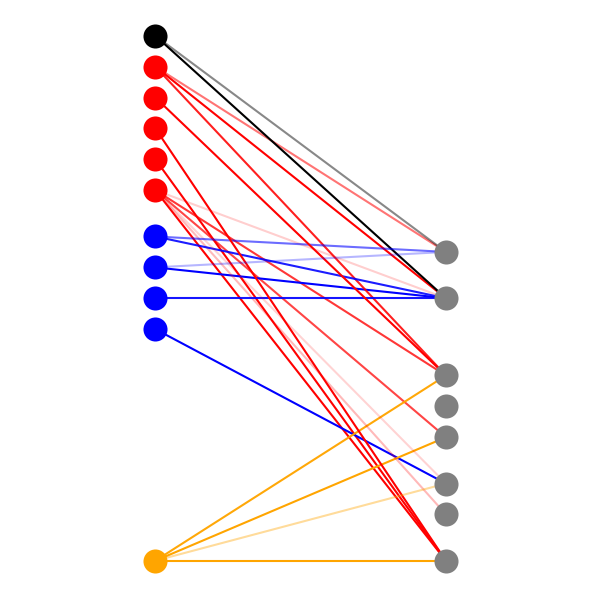

In [28]:
fig = plt.figure(figsize=[7.5, 7.5])
ax = plt.subplot()

# LTR7-HERVH
for subfamily in HERVH_Lift.index:

    position = -position_dict[subfamily] 

    sns.scatterplot(x=[0.75], y=[position], color='grey', s=300, linewidth=0, ax=ax, zorder=100)

# KRAB-ZFP
for gene in HERVH_KRAB.index:

    if gene not in position_dict.keys():

        print(gene)
        continue
    
    position = -position_dict[gene]
    color = color_dict[gene]

    if gene == 'ZNF735':
        color = 'black'

    sns.scatterplot(x=[0.25], y=[position], color=color, s=300, linewidth=0, ax=ax)


# output line
for subfamily, gene in score_dict.keys():

    #if gene not in position_dict.keys():

    #    continue

    x = [0.75, 0.25]
    y = [-position_dict[subfamily], -position_dict[gene]]
    alpha = score_dict[(subfamily, gene)]
    color = color_dict[gene]

    if gene == 'ZNF735':

        color = 'black'

    ax.plot(x, y, color=color, alpha=alpha)


[ax.spines[loc].set_visible(False) for loc in ['top','right','left', 'bottom']]
ax.tick_params(bottom=False, left=False, right=False, top=False)
ax.set_yticklabels('')
ax.set_xticklabels('')
ax.set_xlim(0, 1)

fig.savefig('../Figure/Figure4/Figure4E.png', bbox_inches='tight', dpi=300)
fig.savefig('../Figure/Figure4/Figure4E.pdf', bbox_inches='tight', transparent=True, dpi=300)

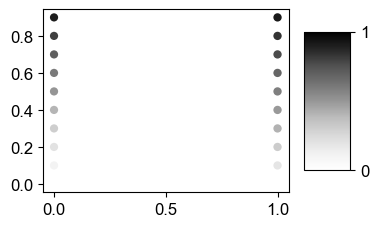

In [29]:
# color bar
fig = plt.figure(figsize=[5, 3])
gs = GridSpec(5, 5)

ax = plt.subplot(gs[:4, :4])
#ax_cbar = plt.subplot(gs[4, 4])
x = [0] * 100
y = np.array(range(100)) / 100
color = np.array(range(100)) / 100

num = 10
x = [0] * num
y = np.array(range(num)) / num
color = np.array(range(num)) / num

mappable = ax.scatter([1]*num, y, color='black', alpha=color, linewidths=0)
mappable = ax.scatter(x, y, c=color, vmin=0, vmax=1, s=35, cmap='Greys', linewidths=0, edgecolor='black')
p = plt.colorbar(mappable=mappable, aspect=3, ax=ax, )

p.set_ticks([0, 1])

fig.savefig('../Figure/Figure4/Figure4E_colorbar.png', bbox_inches='tight', dpi=300)
fig.savefig('../Figure/Figure4/Figure4E_colorbar.pdf', bbox_inches='tight', transparent=True, dpi=300)

# Fig.4F

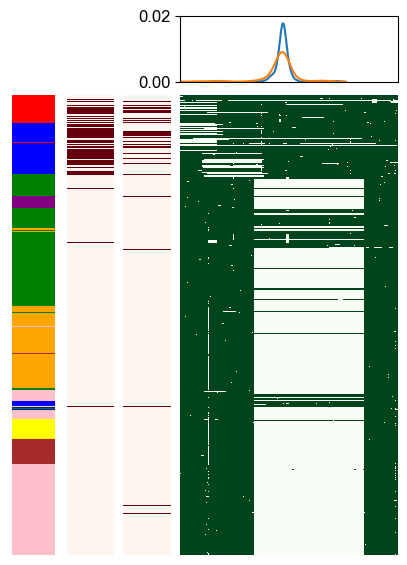

In [30]:
# visualization of the deletion of ZNF600 binding site
fig = plt.figure(figsize=[5, 7])
gs = GridSpec(7, 7)

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12


df = return_yaxis(tree, ax=ax, colour=c_func, size=10).sort_values(by='y', ascending=False)
df.index = range(len(df))

# subfamily
ax = plt.subplot(gs[1:, :1])

for i, color in enumerate(df['color'].values):

    x = [0, 1]
    y = len(df) - i

    ax.hlines(y, 0, 1, color=color)

ax.set_ylim(0, len(df))
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(left=False, right=False, bottom=False, top=False)
[ax.spines[loc].set_visible(False) for loc in ['top','right','left', 'bottom']]


order = Dfam_RM.copy()
order.index = order['repeat adjusted name']
order = order.loc[df['repeat adjusted name']]
order_fil = order[order['repeat name'].isin(MSA_df.index)]


# ZNF600
ax = plt.subplot(gs[1:, 1:2])
gene = 'ZNF600'
data = order_fil
KZFP = KZFP_df[((KZFP_df['repeat family name']=='LTR7_HERVH')) & (KZFP_df['KZFP gene symbol']==gene) & (KZFP_df['summit position in repeat alignment'].astype('float')>=4200) & (KZFP_df['summit position in repeat alignment'].astype('float')<=5300)]
data = data['repeat name'].isin(KZFP['repeat name']).rename(gene).to_frame()

sns.heatmap(data, cmap='Reds', vmin=0, vmax=1, ax=ax, cbar=False)

ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(left=False, bottom=False)

# TRIM28
ax = plt.subplot(gs[1:, 2:3])
data = order_fil
TRIM28 = TRIM28_df[((TRIM28_df['repeat family name']=='LTR7_HERVH')) & (TRIM28_df['summit position in repeat alignment'].astype('float')>=4200) & (TRIM28_df['summit position in repeat alignment'].astype('float')<=5300)]
data = data['repeat name'].isin(TRIM28['repeat name']).rename('TRIM28').to_frame()

sns.heatmap(data, cmap='Reds', vmin=0, vmax=1, ax=ax, cbar=False)

ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(left=False, bottom=False)


# peak position of ZNF600 and TRIM28
ax = plt.subplot(gs[:1, 3:])
data = KZFP['summit position in repeat alignment'].astype('float')
sns.kdeplot(data, ax=ax)

data2 = TRIM28['summit position in repeat alignment'].astype('float')
sns.kdeplot(data2, ax=ax)

ax.set_xlim(4200, 5300)
ax.set_ylim(0, 0.02)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels('')
ax.tick_params(bottom=False)


# heatmap of MSA
ax = plt.subplot(gs[1:, 3:])
MSA = MSA_df

order = Dfam_RM.copy()
order.index = order['repeat adjusted name']
order = order.loc[df['repeat adjusted name']]
order_fil = order[order['repeat name'].isin(MSA.index)]

data = MSA.loc[order_fil['repeat name']][range(4200, 5300)]
data = (data != '-')

sns.heatmap(data, cmap='Greens', ax=ax, cbar=False)

ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_xticklabels('')
ax.tick_params(left=False, bottom=False)

plt.show()

fig.savefig('../Figure/Figure4/Figure4F.png', bbox_inches='tight', dpi=300)
fig.savefig('../Figure/Figure4/Figure4F.pdf', bbox_inches='tight', transparent=True, dpi=300)